In [1]:
import uproot
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
data = uproot.open("newGeo-build/output.root")

print(type(data))

tracking_stations = [data[tree] for tree in data.keys()]

Nevents = len(tracking_stations[0].arrays("fEvent", library="np")['fEvent'])

print(tracking_stations)

<class 'uproot.reading.ReadOnlyDirectory'>
[<TTree 'Hits1' (25 branches) at 0x7fe441a3dff0>, <TTree 'Hits2' (25 branches) at 0x7fe441a060b0>, <TTree 'Hits3' (25 branches) at 0x7fe4713e4f70>, <TTree 'Hits4' (25 branches) at 0x7fe4713e42e0>, <TTree 'Hits5' (25 branches) at 0x7fe441a05f60>]


In [3]:
seperations_array = []
station_zpos = []

delta_x_array = []
delta_y_array = []

energy_em_array = []
energy_ep_array = []

for station in tracking_stations:

    hits = station.arrays(station.keys(), library="np")
    delta_x = np.abs(hits["em_x"] - hits["ep_x"])
    delta_y = np.abs(hits["em_y"] - hits["ep_y"])

    z_pos = np.amax(hits["ep_z"])

    track_separations = np.sqrt(delta_x**2 + delta_y**2)

    seperations_array.append(track_separations)
    station_zpos.append(z_pos)
    delta_x_array.append(delta_x)
    delta_y_array.append(delta_y)
    energy_em_array.append(hits["em_E"])
    energy_ep_array.append(hits["ep_E"])

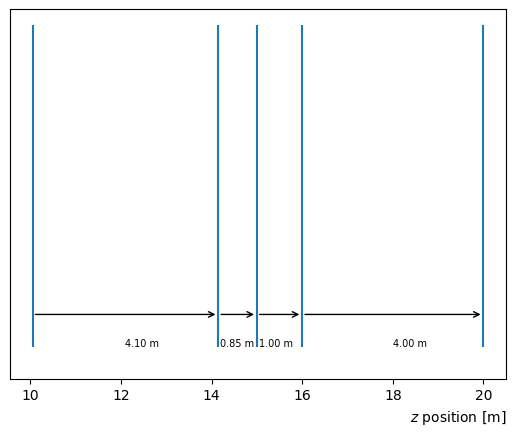

In [69]:
fig, ax = plt.subplots()
zpos = [np.amax(z)/1000 for z in station_zpos]
ax.vlines(zpos, 0.5, 1)
ax.set_xlabel(r"$z$ position [m]", loc='right');
ax.set_ylim(bottom=0.45)

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

for i in range(len(zpos)-1):
    dz = zpos[i+1] - zpos[i]
    ypos = 0.55
    ax.annotate("", xy=(zpos[i+1], ypos), xytext=(zpos[i], ypos),
            arrowprops=dict(arrowstyle="->"))
    
    xpos_mod = [2, 20, 20, 2]
    ypos_mod = [-0.05, -0.05, -0.05, -0.05]

    ax.annotate(f"{dz:.2f} m", xy=(zpos[i+1], ypos), xytext=(zpos[i]+ dz/xpos_mod[i], ypos+ypos_mod[i]), fontsize=7)
    

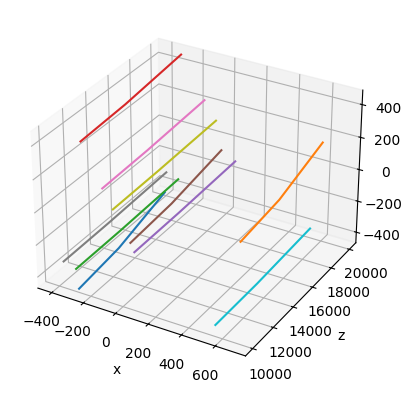

In [119]:
ax = plt.figure().add_subplot(projection='3d')

station_hits = [station.arrays(station.keys(), library="np") for station in tracking_stations]

ep_x = np.column_stack([station["ep_x"][0:10] for station in station_hits])
ep_y = np.column_stack([station["ep_y"][0:10] for station in station_hits])
ep_z = np.column_stack([station["ep_z"][0:10] for station in station_hits])

for x, y, z in zip(ep_x, ep_y, ep_z):
    ax.plot(x, z, y)
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_zlabel("y")

In [102]:
a1 = np.array([1, 2, 3, 4, 5])
a2 = np.array([1, 2, 3, 4, 5])
a3 = np.array([1, 2, 3, 4, 5])

b = np.column_stack([a1,a2,a3])

print(b)

[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]]


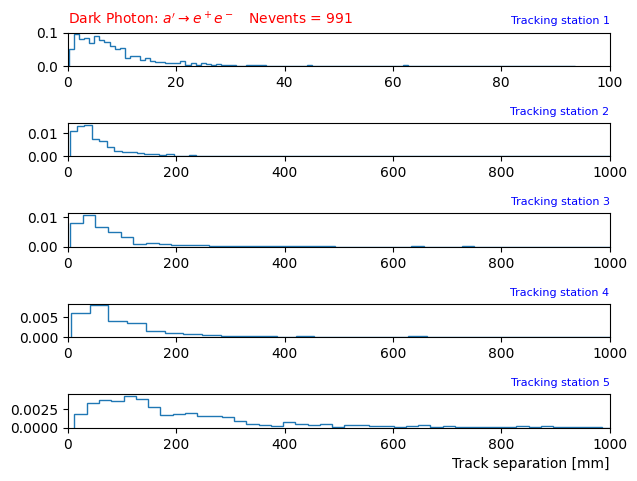

In [5]:
nrows=len(seperations_array)
fig, ax = plt.subplots(nrows=nrows)
plt.tight_layout(pad=2)

bins = [100, 300, 300, 300, 300]
xlims = [100, 1000, 1000, 1000, 1000]

ax[0].set_title(r"Dark Photon: $a' \rightarrow e^+ e ^-$" + f"   Nevents = {Nevents}", loc="left", color="red", fontsize="10")

ax[nrows-1].set_xlabel("Track separation [mm]", loc='right')  # I think units are mm
for i, separation in enumerate(seperations_array):
    ax[i].hist(separation, bins=bins[i], histtype="step", density=True)
    ax[i].set_title(f"Tracking station {i+1}", loc="right", color="blue", fontsize=8)
    ax[i].set_xlim([0, xlims[i]])
plt.savefig("DarkPhoton_epem_track_separation.pdf")
plt.show()




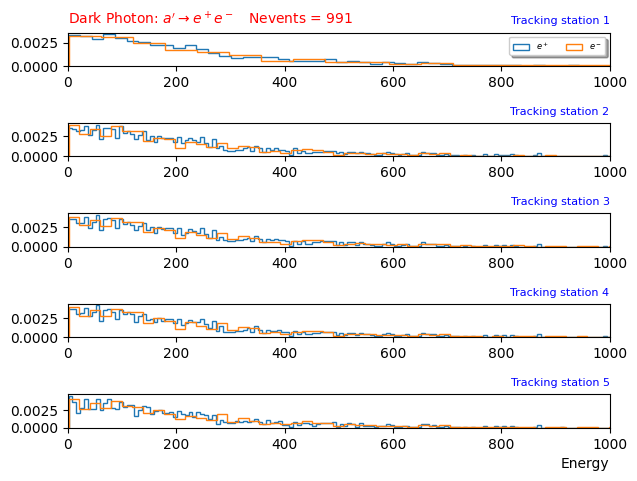

In [15]:
nrows=len(seperations_array)
fig, ax = plt.subplots(nrows=nrows)
plt.tight_layout(pad=2)

bins = [100, 300, 300, 300, 300]
xlims = [1000, 1000, 1000, 1000, 1000]

ax[0].set_title(r"Dark Photon: $a' \rightarrow e^+ e ^-$" + f"   Nevents = {Nevents}", loc="left", color="red", fontsize="10")

ax[nrows-1].set_xlabel("Energy", loc='right')  # I think units are mm
for i, (ep_E, em_E) in enumerate(zip(energy_ep_array, energy_em_array)):
    ax[i].hist(ep_E, bins=bins[i], histtype="step", density=True, label=r"$e^+$")
    ax[i].hist(em_E, bins=bins[i], histtype="step", density=True, label=r"$e^-$")
    ax[i].set_title(f"Tracking station {i+1}", loc="right", color="blue", fontsize=8)
    ax[i].set_xlim([0, xlims[i]])
ax[0].legend(loc='upper right', bbox_to_anchor=(1, 1),
          fancybox=True, shadow=True, ncol=3, fontsize = 6)
plt.savefig("DarkPhoton_epem_energy.pdf")
plt.show()




In [7]:
# nrows=len(seperations_array)
# fig, ax = plt.subplots(nrows=nrows, figsize=(5,20))
# plt.tight_layout(pad=2)

# bins = [100, 100, 100, 100, 100]
# xlims = [60, 200, 400, 600, 800]

# ax[0].set_title(r"Dark Photon: $a' \rightarrow e^+ e ^-$" + f"   Nevents = {Nevents}", loc="left", color="red", fontsize="10")

# ax[nrows-1].set_xlabel("Track separation [mm]", loc='right')  # I think units are mm
# for i, (dx, dy) in enumerate(zip(delta_x_array, delta_y_array)):
#     ax[i].hist2d(dx, dy, bins=(bins[i],bins[i]), density=True)
#     ax[i].set_title(f"Tracking station {i+1}", loc="right", color="blue", fontsize=8)
#     ax[i].set_xlim([0, xlims[i]])
#     # ax[i].set_ylim([0, xlims[i]])

# plt.savefig("DarkPhoton_epem-dxdy.pdf")
# plt.show()




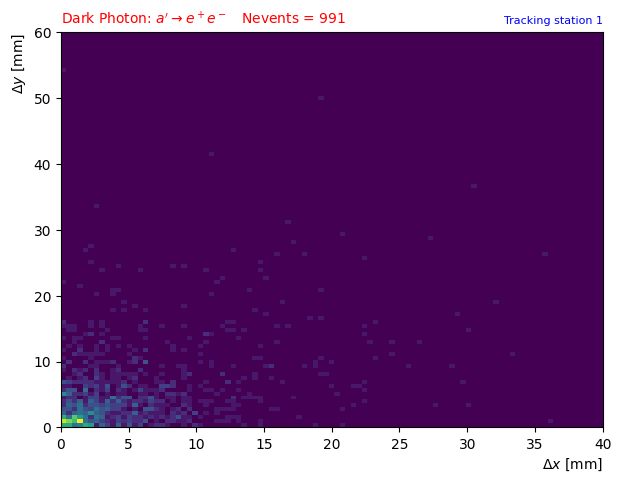

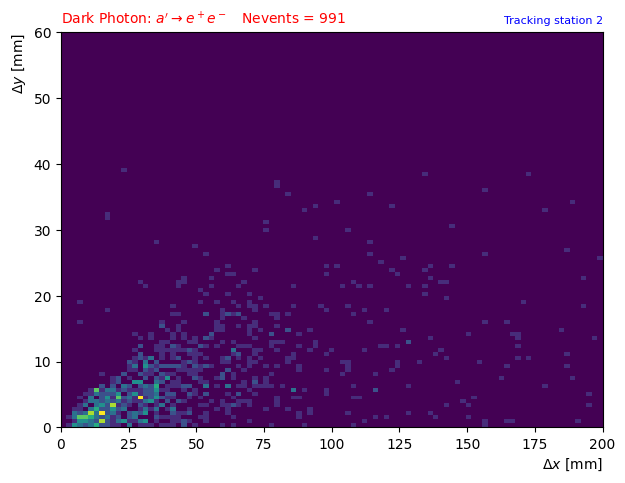

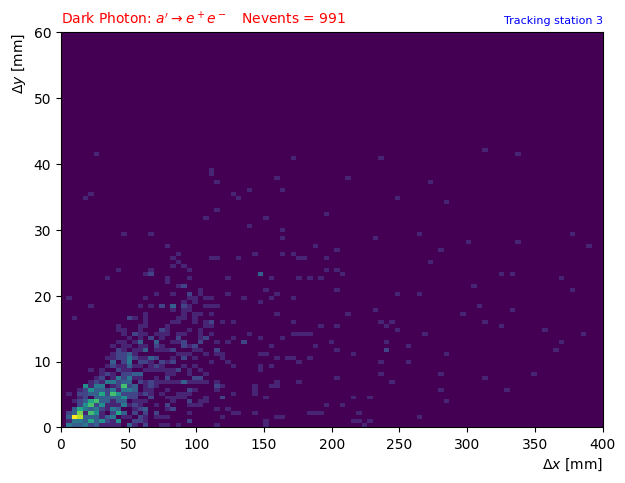

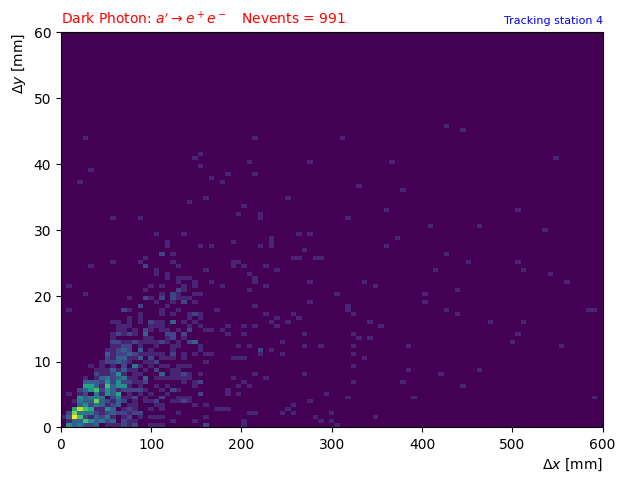

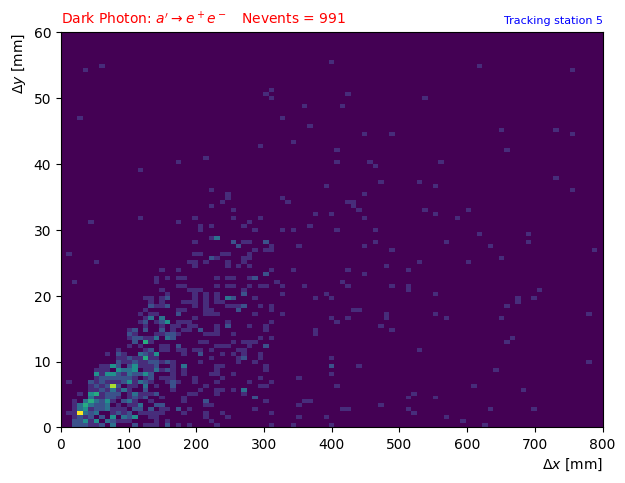

In [8]:
nrows=len(seperations_array)

bins = [100, 100, 100, 100, 100]
bounds = [40, 200, 400, 600, 800]


for i, (dx, dy) in enumerate(zip(delta_x_array, delta_y_array)):

    fig, ax = plt.subplots()
    plt.tight_layout(pad=2)

    ax.set_title(r"Dark Photon: $a' \rightarrow e^+ e ^-$" + f"   Nevents = {Nevents}", loc="left", color="red", fontsize="10")

    ax.set_xlabel(r"$\Delta x$ [mm]", loc='right')  # I think units are mm
    ax.set_ylabel(r"$\Delta y$ [mm]", loc='top')  # I think units are mm

    ax.hist2d(dx, dy, bins=(np.linspace(0, bounds[i], bins[i]), np.linspace(0, 60, bins[i])), density=True)
    ax.set_title(f"Tracking station {i+1}", loc="right", color="blue", fontsize=8)
    ax.set_xlim([0, bounds[i]])
    ax.set_ylim([0, 60])

    # plt.savefig("DarkPhoton_epem-dxdy.pdf")
    plt.show()


